In [94]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

cars = pd.read_csv("imports-85.data", header = None)
cars.columns = cars.columns = 'symboling,normalized_losses,make,fuel_type,aspiration,\
num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,\
width,height,curb_weight,engine_type,num_of_cylinders,engine_size,\
fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,\
city_mpg,highway_mpg,price'.split(',')

# Data cleaning

The dataset contains data about sold cars. The objective is to predict the sales price of a new car given its characteristics

In [3]:
print(cars.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [4]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars = cars.replace("?",np.nan)

In [4]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
cars["normalized_losses"] = cars["normalized_losses"].astype(float)

In [6]:
cars["normalized_losses"].isnull().sum()

41

In [7]:
len(cars)

205

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nu

In [13]:
mean_nm = cars["normalized_losses"].mean()
print(mean_nm)

122.0


In [14]:
cars["normalized_losses"] = cars["normalized_losses"].fillna(mean_nm)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nu

In [18]:
cars["price"] = cars["price"].astype(float)
cars["horsepower"] = cars["horsepower"].astype(float)
cars["peak_rpm"] = cars["peak_rpm"].astype(float)

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nu

In [20]:
cars = cars.dropna(subset = ["price","peak_rpm"])

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
symboling            199 non-null int64
normalized_losses    199 non-null float64
make                 199 non-null object
fuel_type            199 non-null object
aspiration           199 non-null object
num_of_doors         197 non-null object
body_style           199 non-null object
drive_wheels         199 non-null object
engine_location      199 non-null object
wheel_base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb_weight          199 non-null int64
engine_type          199 non-null object
num_of_cylinders     199 non-null object
engine_size          199 non-null int64
fuel_system          199 non-null object
bore                 195 non-null object
stroke               195 non-null object
compression_ratio    199 non-null float64
horsepower           199 non-nu

In [22]:
cars = cars.reset_index(drop=True)

In [24]:
cars_df = cars[["symboling","normalized_losses","wheel_base","engine_size","horsepower","peak_rpm","price"]]

In [26]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
symboling            199 non-null int64
normalized_losses    199 non-null float64
wheel_base           199 non-null float64
engine_size          199 non-null int64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
price                199 non-null float64
dtypes: float64(5), int64(2)
memory usage: 11.0 KB


In [31]:
cars_df=(cars_df-cars_df.mean())/cars_df.std()
cars_df["price"] = cars["price"]

In [32]:
cars_df.head()

,symboling,normalized_losses,wheel_base,engine_size,horsepower,peak_rpm,price
0,NaN,0.246194,-1.901259,0.386956,0.527009,-0.151797,13495.0
1,NaN,0.246194,-1.901259,0.386956,0.527009,-0.151797,16500.0
2,NaN,0.246194,-0.717016,0.892778,1.255169,-0.151797,16500.0
3,NaN,1.166899,0.227410,-0.286347,0.296907,0.815361,13950.0
4,NaN,1.166899,0.159646,0.541137,0.617716,0.815361,17450.0


# K-nearest-neighbors

In [67]:
def knn_train_test(training_column, target_column, df, k):
    df_train = df.iloc[0:150]
    df_test = df.iloc[150:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(df_train[[training_columns]], df_train[target_column])
    predictions = knn.predict(df_test[[training_columns]])
    rmse = np.sqrt(mean_squared_error(predictions,df_test[target_column]))
    return rmse

In [45]:
rmse_normalized_losses = knn_train_test("normalized_losses", "price", cars_df)
rmse_wheel_base = knn_train_test("wheel_base", "price", cars_df)
rmse_engine_size = knn_train_test("engine_size", "price", cars_df)
rmse_horsepower = knn_train_test("horsepower", "price", cars_df)
rmse_peak_rpm = knn_train_test("peak_rpm", "price", cars_df)

In [47]:
print(rmse_normalized_losses)
print(rmse_wheel_base)
print(rmse_engine_size)
print(rmse_horsepower)
print(rmse_peak_rpm)

10411.743266453059
5730.018859747428
3344.2483464074517
3723.4937263000616
7420.79089689975


In [53]:
columns = cars_df.columns.tolist()
columns.remove("symboling")
columns.remove("price")

# Hyperparameters optimization

In [58]:
rmse_normalized_losses = []
k_list = [1,3,5,7,9]
for k in k_list:
    rmse = knn_train_test("normalized_losses", "price", cars_df, k)
    rmse_normalized_losses.append(rmse)

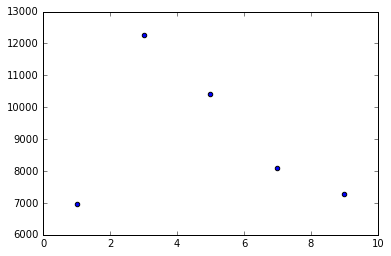

In [61]:
plt.scatter(k_list, rmse_normalized_losses)
plt.show()

In [62]:
rmse_engine_size = []
k_list = [1,3,5,7,9]
for k in k_list:
    rmse = knn_train_test("engine_size", "price", cars_df, k)
    rmse_engine_size.append(rmse)

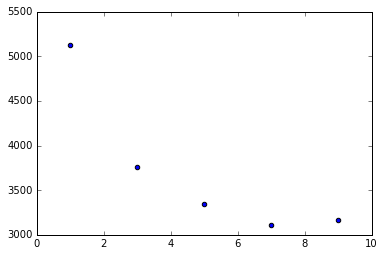

In [63]:
plt.scatter(k_list, rmse_engine_size)
plt.show()

In [65]:
rmse_horsepower = []
k_list = [1,3,5,7,9]
for k in k_list:
    rmse = knn_train_test("horsepower", "price", cars_df, k)
    rmse_horsepower.append(rmse)

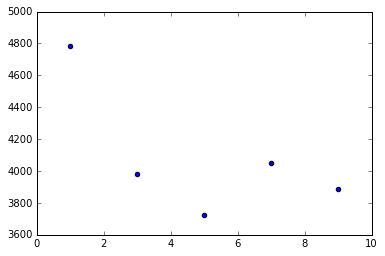

In [66]:
plt.scatter(k_list, rmse_horsepower)
plt.show()

# Features selection

In [119]:
def knn_train_test(training_columns, target_column, df, k):
    df_train = df.iloc[0:150]
    df_test = df.iloc[150:]
    #knn = KNeighborsRegressor()
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(df_train[training_columns], df_train[target_column])
    predictions = knn.predict(df_test[training_columns])
    rmse = np.sqrt(mean_squared_error(predictions,df_test[target_column]))
    return rmse

In [120]:
col = ["horsepower","engine_size"]
rmse_2 = knn_train_test(col,"price",cars_df,k)

In [121]:
col = ["horsepower","engine_size","wheel_base"]
rmse_3 = knn_train_test(col,"price",cars_df,k)

In [122]:
col = ["horsepower","engine_size","wheel_base","peak_rpm"]
rmse_4 = knn_train_test(col,"price",cars_df,k)

In [123]:
col = ["horsepower","engine_size","wheel_base","peak_rpm","normalized_losses"]
rmse_5 = knn_train_test(col,"price",cars_df,k)

In [124]:
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)

3787.7625786461012
3006.9175056463705
2387.1615964618454
2509.7696808158835


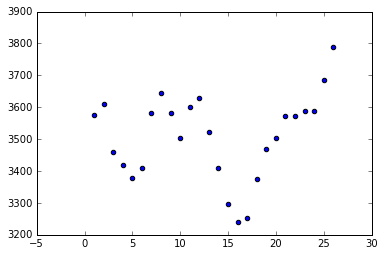

15 3239.7926704763368


In [125]:
rmses_2 = []
k_list = [k+1 for k in range(26)]
for k in k_list:
    rmse = knn_train_test(["horsepower","engine_size"],"price",cars_df,k)
    rmses_2.append(rmse)
    
plt.scatter(k_list,rmses_2)
plt.show()

min_rmse = min(rmses_2)
best_k = rmses_2.index(min_rmse)
print(best_k, min_rmse)
    

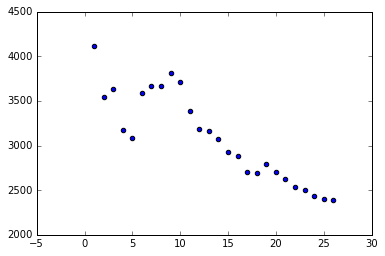

25 2387.1615964618454


In [126]:
rmses_4 = []
k_list = [k+1 for k in range(26)]
for k in k_list:
    rmse = knn_train_test(["horsepower","engine_size","wheel_base","peak_rpm"],"price",cars_df,k)
    rmses_4.append(rmse)
    
plt.scatter(k_list,rmses_4)
plt.show()

min_rmse = min(rmses_4)
best_k = rmses_4.index(min_rmse)
print(best_k, min_rmse)

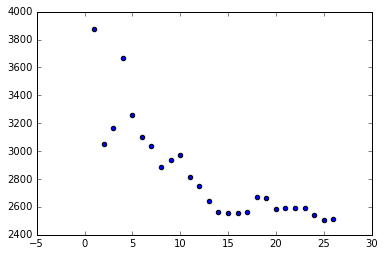

24 2507.9042282335736


In [127]:
rmses_5 = []
k_list = [k+1 for k in range(26)]
for k in k_list:
    rmse = knn_train_test(["horsepower","engine_size","wheel_base","peak_rpm","normalized_losses"],"price",cars_df,k)
    rmses_5.append(rmse)
    
plt.scatter(k_list,rmses_5)
plt.show()

min_rmse = min(rmses_5)
best_k = rmses_5.index(min_rmse)
print(best_k, min_rmse)

The best result seems to be achieved using 4 features : horsepower, engine_size, wheel_base, peak_rpm

# Cross validation

In [128]:
#cross validation

kf = KFold(10, shuffle = True, random_state =1)

def knn_train_test(training_columns, target_column, df, k):
    #df_train = df.iloc[0:150]
    #df_test = df.iloc[150:]
    knn = KNeighborsRegressor()
    #knn = KNeighborsRegressor(n_neighbors = k)
    #knn.fit(df_train[training_columns], df_train[target_column])
    #predictions = knn.predict(df_test[training_columns])
    mses = cross_val_score(knn, cars_df[training_columns], cars_df[target_column],
scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = rmses.mean()
    std_rmse = rmses.std()
    #rmse = np.sqrt(mses)
    return avg_rmse, std_rmse

In [129]:
col = ["horsepower","engine_size"]
rmse_2 = knn_train_test(col,"price",cars_df,k)

In [130]:
col = ["horsepower","engine_size","wheel_base"]
rmse_3 = knn_train_test(col,"price",cars_df,k)

In [131]:
col = ["horsepower","engine_size","wheel_base","peak_rpm"]
rmse_4 = knn_train_test(col,"price",cars_df,k)

In [132]:
col = ["horsepower","engine_size","wheel_base","peak_rpm","normalized_losses"]
rmse_5 = knn_train_test(col,"price",cars_df,k)

In [133]:
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)

(2561.3179177349557, 398.49232138858196)
(3679.0567062979962, 1056.7409693668924)
(3599.575438935039, 1197.4397826392787)
(3709.5162679311593, 1118.5261704706631)


Using cross validation, the best result is achieved with 2 features : horsepower and engine size